In [ ]:
# todo 还需要水泵的变化，或者是冷冻水进入盘管的量的变化，从而对应末端负荷的变化。
# todo 是否考虑把室内的温湿度范围划出来，在一张图上面显示是否有区别——完成
# todo 用PMV或者PPD的histogram进行对比分析，这都可以放到专门的热舒适性文章里面去
# todo 如果加上噪声，应该有些图形会不一样哈，不会那么笔直一条线，那么就有意思了哈
'''
以仿真结果来看，还要考虑实际测量结果(故障值)是不一样的，而不是仅以仿真结果（真实值）来分析。用测量值来看的话，分析结果是有点意思的。
同样的室内温度条件下,可能还会涉及到分布密度的问题.证明结果不太一致。和
'''
# todo 在PLR和COP或者其他类似的scatter图里面加上回归曲线如何？
# todo 对于COP还有没有其他的方法进行评价，如IPLV,SPLV,SDOP等等，看看清华大学的论文
# todo 除法的时候把时间也除了

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

file1 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw05-rm26_Output_timestep.csv'
file2 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw06-rm26_Output_timestep.csv'
file3 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm26_Output_timestep.csv'
file4 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw08-rm26_Output_timestep.csv'
file5 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw09-rm26_Output_timestep.csv'
file6 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw10-rm26_Output_timestep.csv'
file7 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw11-rm26_Output_timestep.csv'
file8 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw12-rm26_Output_timestep.csv'
file9 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw13-rm26_Output_timestep.csv'
file10 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw14-rm26_Output_timestep.csv'
file11 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw15-rm26_Output_timestep.csv'

file21 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm18_Output_timestep.csv'
file22 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm19_Output_timestep.csv'
file23 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm20_Output_timestep.csv'
file24 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm21_Output_timestep.csv'
file25 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm22_Output_timestep.csv'
file26 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm23_Output_timestep.csv'
file27 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm24_Output_timestep.csv'
file28 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm25_Output_timestep.csv'
file29 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm27_Output_timestep.csv'
file30 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm28_Output_timestep.csv'
file31 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm29_Output_timestep.csv'
file32 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm30_Output_timestep.csv'
file33 = 'E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm31_Output_timestep.csv'

Chw05_Rm26 = pd.read_csv(file1, header=0)
Chw06_Rm26 = pd.read_csv(file2, header=0)
Chw07_Rm26 = pd.read_csv(file3, header=0)
Chw08_Rm26 = pd.read_csv(file4, header=0)
Chw09_Rm26 = pd.read_csv(file5, header=0)
Chw10_Rm26 = pd.read_csv(file6, header=0)
Chw11_Rm26 = pd.read_csv(file7, header=0)
Chw12_Rm26 = pd.read_csv(file8, header=0)
Chw13_Rm26 = pd.read_csv(file9, header=0)
Chw14_Rm26 = pd.read_csv(file10, header=0)
Chw15_Rm26 = pd.read_csv(file11, header=0)

Chw07_Rm18 = pd.read_csv(file21, header=0)
Chw07_Rm19 = pd.read_csv(file22, header=0)
Chw07_Rm20 = pd.read_csv(file23, header=0)
Chw07_Rm21 = pd.read_csv(file24, header=0)
Chw07_Rm22 = pd.read_csv(file25, header=0)
Chw07_Rm23 = pd.read_csv(file26, header=0)
Chw07_Rm24 = pd.read_csv(file27, header=0)
Chw07_Rm25 = pd.read_csv(file28, header=0)
Chw07_Rm27 = pd.read_csv(file29, header=0)
Chw07_Rm28 = pd.read_csv(file30, header=0)
Chw07_Rm29 = pd.read_csv(file31, header=0)
Chw07_Rm30 = pd.read_csv(file32, header=0)
Chw07_Rm31 = pd.read_csv(file33, header=0)

# do not need to change the date type in EPlus
# dateparse = lambda x: pd.datetime.strptime(x, '%Y/%m/%d %H:%M')
# Chw05_Rm26 = pd.read_csv(file1, parse_dates = ['Date'], date_parser=dateparse, header=0)

Chw07_Rm26.dtypes
# ;Chw07_Rm26.dtypes;Chw12_Rm26.dtypes

Date/Time                                                                           object
Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)                     float64
ZONE-4-SOUTH PEOPLE:Zone Thermal Comfort Fanger Model PMV [](TimeStep)             float64
ZONE-4-SOUTH PEOPLE:Zone Thermal Comfort Fanger Model PPD [%](TimeStep)            float64
ZONE-4-SOUTH:Zone Air Temperature [C](TimeStep)                                    float64
ZONE-4-SOUTH:Zone Air Relative Humidity [%](TimeStep)                              float64
ZONE-4-SOUTH COOLING COIL CHW INLET:System Node Temperature [C](TimeStep)          float64
ZONE-4-SOUTH COOLING COIL CHW OUTLET:System Node Temperature [C](TimeStep)         float64
ZONE-4-SOUTH COOLING COIL CHW INLET:System Node Mass Flow Rate [kg/s](TimeStep)    float64
ZONE-4-SOUTH SUPPLY FAN OUTLET:System Node Temperature [C](TimeStep)               float64
ZONE-4-SOUTH SUPPLY FAN OUTLET:System Node Relative Humidity [%](TimeStep)         float64

In [2]:
a,b=Chw07_Rm28.shape
a,b

(11712, 43)

In [3]:
samples = 24*(30+31+31+30)*4
# samples
ClgSeason = pd.date_range('6/1/2017 00:15:00',periods = samples, freq = '15min')
ClgSeason=pd.to_datetime( ClgSeason,format = '%m-%d %H:%M' )
ClgSeason

DatetimeIndex(['2017-06-01 00:15:00', '2017-06-01 00:30:00',
               '2017-06-01 00:45:00', '2017-06-01 01:00:00',
               '2017-06-01 01:15:00', '2017-06-01 01:30:00',
               '2017-06-01 01:45:00', '2017-06-01 02:00:00',
               '2017-06-01 02:15:00', '2017-06-01 02:30:00',
               ...
               '2017-09-30 21:45:00', '2017-09-30 22:00:00',
               '2017-09-30 22:15:00', '2017-09-30 22:30:00',
               '2017-09-30 22:45:00', '2017-09-30 23:00:00',
               '2017-09-30 23:15:00', '2017-09-30 23:30:00',
               '2017-09-30 23:45:00', '2017-10-01 00:00:00'],
              dtype='datetime64[ns]', length=11712, freq='15T')

In [4]:
column = Chw05_Rm26.columns.values.tolist()
column

['Date/Time',
 'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',
 'ZONE-4-SOUTH PEOPLE:Zone Thermal Comfort Fanger Model PMV [](TimeStep)',
 'ZONE-4-SOUTH PEOPLE:Zone Thermal Comfort Fanger Model PPD [%](TimeStep)',
 'ZONE-4-SOUTH:Zone Air Temperature [C](TimeStep)',
 'ZONE-4-SOUTH:Zone Air Relative Humidity [%](TimeStep)',
 'ZONE-4-SOUTH COOLING COIL CHW INLET:System Node Temperature [C](TimeStep)',
 'ZONE-4-SOUTH COOLING COIL CHW OUTLET:System Node Temperature [C](TimeStep)',
 'ZONE-4-SOUTH COOLING COIL CHW INLET:System Node Mass Flow Rate [kg/s](TimeStep)',
 'ZONE-4-SOUTH SUPPLY FAN OUTLET:System Node Temperature [C](TimeStep)',
 'ZONE-4-SOUTH SUPPLY FAN OUTLET:System Node Relative Humidity [%](TimeStep)',
 'ZONE-4-SOUTH SUPPLY FAN OUTLET:System Node Enthalpy [J/kg](TimeStep)',
 'ZONE-4-SOUTH COOLING COIL OUTLET:System Node Temperature [C](TimeStep)',
 'ZONE-4-SOUTH COOLING COIL OUTLET:System Node Relative Humidity [%](TimeStep)',
 'ZONE-4-SOUTH COOLING COIL OUTLET:S

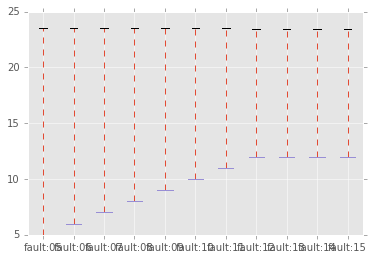

In [5]:
# ChillerOutlet Temperature Rm 26
ChillerOutTemp_chw_fault = pd.DataFrame( {
        'Time': ClgSeason[:]   
        ,'fault:05':Chw05_Rm26.ix[:,column[27]]
        ,'fault:06':Chw06_Rm26.ix[:,column[27]]
        ,'fault:07':Chw07_Rm26.ix[:,column[27]]
        ,'fault:08':Chw08_Rm26.ix[:,column[27]]
        ,'fault:09':Chw09_Rm26.ix[:,column[27]]
        ,'fault:10':Chw10_Rm26.ix[:,column[27]]
        ,'fault:11':Chw11_Rm26.ix[:,column[27]]
        ,'fault:12':Chw12_Rm26.ix[:,column[27]]
        ,'fault:13':Chw12_Rm26.ix[:,column[27]]
        ,'fault:14':Chw12_Rm26.ix[:,column[27]]
        ,'fault:15':Chw12_Rm26.ix[:,column[27]]
    } )
ChillerOutTemp_chw_fault.index = pd.to_datetime(ChillerOutTemp_chw_fault['Time'])
ChillerOutTemp_chw_fault.head(5)
ChillerOutTemp_chw = ChillerOutTemp_chw_fault[( (ChillerOutTemp_chw_fault.index.weekday != 5 ) & ( ChillerOutTemp_chw_fault.index.weekday != 6 ) )
                 & ( (ChillerOutTemp_chw_fault.index.hour >= 8) & (ChillerOutTemp_chw_fault.index.hour <=17 ) )
                  ]
ChillerOutTemp_chw.to_csv('E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw00-rm26-ChillerOutTemp.csv')
ChillerOutTemp_chw.plot.box()

In [8]:
AA = ChillerOutTemp_chw_fault.resample('30min')
AA

,fault:05,fault:06,fault:07,fault:08,fault:09,fault:10,fault:11,fault:12,fault:13,fault:14,fault:15
Time,,,,,,,,,,,
2017-06-01 00:00:00,23.486516,23.497129,23.504592,23.508602,23.508697,23.504323,23.494444,23.477869,23.477869,23.477869,23.477869
2017-06-01 00:30:00,23.486516,23.497129,23.504592,23.508602,23.508697,23.504323,23.494444,23.477869,23.477869,23.477869,23.477869
2017-06-01 01:00:00,23.486516,23.497129,23.504592,23.508602,23.508697,23.504323,23.494444,23.477869,23.477869,23.477869,23.477869
2017-06-01 01:30:00,23.486516,23.497129,23.504592,23.508602,23.508697,23.504323,23.494444,23.477869,23.477869,23.477869,23.477869
2017-06-01 02:00:00,23.486516,23.497129,23.504592,23.508602,23.508697,23.504323,23.494444,23.477869,23.477869,23.477869,23.477869
2017-06-01 02:30:00,23.486516,23.497129,23.504592,23.508602,23.508697,23.504323,23.494444,23.477869,23.477869,23.477869,23.477869
2017-06-01 03:00:00,23.486516,23.497129,23.504592,23.508602,23.508697,23.504323,23.494444,23.477869,23.477869,23.477869,23.477869
2017-06-01 03:30:00,23.486516,23.497129,23.504592,23.508602,23.508697,23.504323,23.494444,23.477869,23.477869,23.477869,23.477869
2017-06-01 04:00:00,23.486516,23.497129,23.504592,23.508602,23.508697,23.504323,23.494444,23.477869,23.477869,23.477869,23.477869


In [ ]:
# Chiller Inlet Temperature Rm 26
ChillerInTemp_chw_fault = pd.DataFrame( {
        'Time': ClgSeason[:]   
        ,'fault:05':Chw05_Rm26.ix[:,column[26]]
        ,'fault:06':Chw06_Rm26.ix[:,column[26]]
        ,'fault:07':Chw07_Rm26.ix[:,column[26]]
        ,'fault:08':Chw08_Rm26.ix[:,column[26]]
        ,'fault:09':Chw09_Rm26.ix[:,column[26]]
        ,'fault:10':Chw10_Rm26.ix[:,column[26]]
        ,'fault:11':Chw11_Rm26.ix[:,column[26]]
        ,'fault:12':Chw12_Rm26.ix[:,column[26]]
        ,'fault:13':Chw12_Rm26.ix[:,column[26]]
        ,'fault:14':Chw12_Rm26.ix[:,column[26]]
        ,'fault:15':Chw12_Rm26.ix[:,column[26]]
    } )
ChillerInTemp_chw_fault.index = pd.to_datetime(ChillerInTemp_chw_fault['Time'])
ChillerInTemp_chw_fault.head(5)
ChillerInTemp_chw = ChillerInTemp_chw_fault[( (ChillerInTemp_chw_fault.index.weekday != 5 ) & ( ChillerInTemp_chw_fault.index.weekday != 6 ) )
                 & ( (ChillerInTemp_chw_fault.index.hour >= 8) & (ChillerInTemp_chw_fault.index.hour <=17 ) )
                  ]
ChillerInTemp_chw.to_csv('E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw00-rm26-ChillerInTemp.csv')
ChillerInTemp_chw.plot.box()

In [ ]:
# ChillerOutlet Massflowerature Rm 26
ChillerOutMassflow_chw_fault = pd.DataFrame( {
        'Time': ClgSeason[:]   
        ,'fault:05':Chw05_Rm26.ix[:,column[35]]
        ,'fault:06':Chw06_Rm26.ix[:,column[35]]
        ,'fault:07':Chw07_Rm26.ix[:,column[35]]
        ,'fault:08':Chw08_Rm26.ix[:,column[35]]
        ,'fault:09':Chw09_Rm26.ix[:,column[35]]
        ,'fault:10':Chw10_Rm26.ix[:,column[35]]
        ,'fault:11':Chw11_Rm26.ix[:,column[35]]
        ,'fault:12':Chw12_Rm26.ix[:,column[35]]
        ,'fault:13':Chw12_Rm26.ix[:,column[35]]
        ,'fault:14':Chw12_Rm26.ix[:,column[35]]
        ,'fault:15':Chw12_Rm26.ix[:,column[35]]
    } )
ChillerOutMassflow_chw_fault.index = pd.to_datetime(ChillerOutMassflow_chw_fault['Time'])
ChillerOutMassflow_chw_fault.head(5)
ChillerOutMassflow_chw = ChillerOutMassflow_chw_fault[( (ChillerOutMassflow_chw_fault.index.weekday != 5 ) & ( ChillerOutMassflow_chw_fault.index.weekday != 6 ) )
                 & ( (ChillerOutMassflow_chw_fault.index.hour >= 8) & (ChillerOutMassflow_chw_fault.index.hour <=17 ) )
                  ]
ChillerOutMassflow_chw.to_csv('E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw00-rm26-ChillerOutMassflow.csv')
ChillerOutMassflow_chw.plot.box()

In [ ]:
# temperature vs relative humidity
plt.figure()
ax = plt.axes()
ax.scatter(ChillerOutTemp_chw_fault['fault:05']+2,ChillerInTemp_chw_fault['fault:05'],c='r')
# plt.xlim(5,20)
# plt.figure()
# ax = plt.axes()
ax.scatter(ChillerOutTemp_chw_fault['fault:07'],ChillerInTemp_chw_fault['fault:07'],c='b')
# plt.xlim(5,20)
# plt.figure()
# ax = plt.axes()
ax.scatter(ChillerOutTemp_chw_fault['fault:09']-2,ChillerInTemp_chw_fault['fault:09'],c='y')
plt.xlim(5,20)

In [ ]:
plt.figure()
ax = plt.axes()
ax.plot(ChillerOutTemp_chw_fault['Time']['2017-8-11'],ChillerOutTemp_chw_fault['fault:05']['2017-8-11'],c='r')
ax.plot(ChillerOutTemp_chw_fault['Time']['2017-8-11'],ChillerOutTemp_chw_fault['fault:07']['2017-8-11'],c='b')
ax.plot(ChillerOutTemp_chw_fault['Time']['2017-8-11'],ChillerOutTemp_chw_fault['fault:09']['2017-8-11']-2,c='y')

In [ ]:
plt.figure()
ax = plt.axes()
ax.plot(ChillerOutTemp_chw_fault['Time']['2017-8-11'],ChillerInTemp_chw_fault['fault:05']['2017-8-11'],c='r')
ax.plot(ChillerOutTemp_chw_fault['Time']['2017-8-11'],ChillerInTemp_chw_fault['fault:07']['2017-8-11'],c='b')
ax.plot(ChillerOutTemp_chw_fault['Time']['2017-8-11'],ChillerInTemp_chw_fault['fault:09']['2017-8-11'],c='y')

In [ ]:
plt.figure()
ax = plt.axes()
ax.plot(ChillerOutTemp_chw_fault['Time']['2017-8-11'],(ChillerInTemp_chw_fault['fault:05']['2017-8-11']+2-ChillerOutTemp_chw_fault['fault:05']['2017-8-11']),c='r')
# plt.figure()
# ax = plt.axes()
ax.plot(ChillerOutTemp_chw_fault['Time']['2017-8-11'],(ChillerInTemp_chw_fault['fault:07']['2017-8-11']-ChillerOutTemp_chw_fault['fault:07']['2017-8-11']),c='b')
# plt.figure()
# ax = plt.axes()
ax.plot(ChillerOutTemp_chw_fault['Time']['2017-8-11'],(ChillerInTemp_chw_fault['fault:09']['2017-8-11']-2-ChillerOutTemp_chw_fault['fault:09']['2017-8-11']),c='y')

In [ ]:
plt.figure()
ax = plt.axes()
ax.plot(ChillerOutMassflow_chw['Time']['2017-8-11'],ChillerOutMassflow_chw['fault:05']['2017-8-11'],c='r')
ax.plot(ChillerOutMassflow_chw['Time']['2017-8-11'],ChillerOutMassflow_chw['fault:07']['2017-8-11'],c='b')
ax.plot(ChillerOutMassflow_chw['Time']['2017-8-11'],ChillerOutMassflow_chw['fault:09']['2017-8-11'],c='y')

In [ ]:
plt.figure()
ax = plt.axes()
ax.plot(ChillerOutTemp_chw_fault['Time']['2017-8-11'],
(ChillerInTemp_chw_fault['fault:05']['2017-8-11']+2-ChillerOutTemp_chw_fault['fault:05']['2017-8-11'])*ChillerOutMassflow_chw['fault:05']['2017-8-11'],c='r')
ax.plot(ChillerOutTemp_chw_fault['Time']['2017-8-11'],
(ChillerInTemp_chw_fault['fault:07']['2017-8-11']-ChillerOutTemp_chw_fault['fault:07']['2017-8-11'])*ChillerOutMassflow_chw['fault:07']['2017-8-11'],c='b')
ax.plot(ChillerOutTemp_chw_fault['Time']['2017-8-11'],
(ChillerInTemp_chw_fault['fault:09']['2017-8-11']-2-ChillerOutTemp_chw_fault['fault:09']['2017-8-11'])*ChillerOutMassflow_chw['fault:09']['2017-8-11'],c='y')

plt.figure()
ax = plt.axes()
ax.plot(ChillerOutTemp_chw_fault['Time']['2017-8-11'],
(ChillerInTemp_chw_fault['fault:05']['2017-8-11']-ChillerOutTemp_chw_fault['fault:05']['2017-8-11'])*ChillerOutMassflow_chw['fault:05']['2017-8-11'],c='r')
ax.plot(ChillerOutTemp_chw_fault['Time']['2017-8-11'],
(ChillerInTemp_chw_fault['fault:07']['2017-8-11']-ChillerOutTemp_chw_fault['fault:07']['2017-8-11'])*ChillerOutMassflow_chw['fault:07']['2017-8-11'],c='b')
ax.plot(ChillerOutTemp_chw_fault['Time']['2017-8-11'],
(ChillerInTemp_chw_fault['fault:09']['2017-8-11']-ChillerOutTemp_chw_fault['fault:09']['2017-8-11'])*ChillerOutMassflow_chw['fault:09']['2017-8-11'],c='y')

In [ ]:
# ChillerOutlet Temperature Chw 07
ChillerOutTemp_rm_fault = pd.DataFrame( {
        'Time': ClgSeason[:]   
        ,'rm:18':Chw07_Rm18.ix[:,column[27]]
        ,'rm:19':Chw07_Rm19.ix[:,column[27]]
        ,'rm:20':Chw07_Rm20.ix[:,column[27]]
        ,'rm:21':Chw07_Rm21.ix[:,column[27]]
        ,'rm:22':Chw07_Rm22.ix[:,column[27]]
        ,'rm:23':Chw07_Rm23.ix[:,column[27]]
        ,'rm:24':Chw07_Rm24.ix[:,column[27]]
        ,'rm:25':Chw07_Rm25.ix[:,column[27]]
        ,'rm:26':Chw07_Rm26.ix[:,column[27]]
        ,'rm:27':Chw07_Rm27.ix[:,column[27]]
        ,'rm:28':Chw07_Rm28.ix[:,column[27]]
        ,'rm:29':Chw07_Rm29.ix[:,column[27]]
        ,'rm:30':Chw07_Rm30.ix[:,column[27]]
        ,'rm:31':Chw07_Rm31.ix[:,column[27]]
    } )
ChillerOutTemp_rm_fault.index = pd.to_datetime(ChillerOutTemp_rm_fault['Time'])
ChillerOutTemp_rm_fault.head(5)
ChillerOutTemp_rm = ChillerOutTemp_rm_fault[( (ChillerOutTemp_rm_fault.index.weekday != 5 ) & ( ChillerOutTemp_rm_fault.index.weekday != 6 ) )
                             & ( (ChillerOutTemp_rm_fault.index.hour >= 8) & (ChillerOutTemp_rm_fault.index.hour <=17 ) )
                  ]
ChillerOutTemp_rm.to_csv('E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm00-ChillerOutTemp.csv')
ChillerOutTemp_rm.plot.box()

In [ ]:
# # ChillerInlet Temperature Chw 07
ChillerInTemp_rm_fault = pd.DataFrame( {
        'Time': ClgSeason[:]   
        ,'rm:18':Chw07_Rm18.ix[:,column[26]]
        ,'rm:19':Chw07_Rm19.ix[:,column[26]]
        ,'rm:20':Chw07_Rm20.ix[:,column[26]]
        ,'rm:21':Chw07_Rm21.ix[:,column[26]]
        ,'rm:22':Chw07_Rm22.ix[:,column[26]]
        ,'rm:23':Chw07_Rm23.ix[:,column[26]]
        ,'rm:24':Chw07_Rm24.ix[:,column[26]]
        ,'rm:25':Chw07_Rm25.ix[:,column[26]]
        ,'rm:26':Chw07_Rm26.ix[:,column[26]]
        ,'rm:27':Chw07_Rm27.ix[:,column[26]]
        ,'rm:28':Chw07_Rm28.ix[:,column[26]]
        ,'rm:29':Chw07_Rm29.ix[:,column[26]]
        ,'rm:30':Chw07_Rm30.ix[:,column[26]]
        ,'rm:31':Chw07_Rm31.ix[:,column[26]]
    } )
ChillerInTemp_rm_fault.index = pd.to_datetime(ChillerInTemp_rm_fault['Time'])
ChillerInTemp_rm_fault.head(5)
ChillerInTemp_rm = ChillerInTemp_rm_fault[( (ChillerInTemp_rm_fault.index.weekday != 5 ) & ( ChillerInTemp_rm_fault.index.weekday != 6 ) )
                             & ( (ChillerInTemp_rm_fault.index.hour >= 8) & (ChillerInTemp_rm_fault.index.hour <=17 ) )
                  ]
ChillerInTemp_rm.to_csv('E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm00-ChillerInTemp.csv')
ChillerInTemp_rm.plot.box()

In [ ]:
# temperature vs relative humidity
plt.figure()
ax = plt.axes()
ax.scatter(ChillerInTemp_rm_fault['rm:22'],ChillerOutTemp_rm_fault['rm:22'],c='r')
# plt.figure()
# ax = plt.axes()
ax.scatter(ChillerInTemp_rm_fault['rm:26'],ChillerOutTemp_rm_fault['rm:26'],c='b')
# plt.figure()
# ax = plt.axes()
ax.scatter(ChillerInTemp_rm_fault['rm:30'],ChillerOutTemp_rm_fault['rm:30'],c='y')

In [ ]:
# Indoor Drybule Temperature Chw 07
IndoorDryTemp_rm_fault = pd.DataFrame( {
        'Time': ClgSeason[:]   
        ,'rm:18':Chw07_Rm18.ix[:,column[4]]
        ,'rm:19':Chw07_Rm19.ix[:,column[4]]
        ,'rm:20':Chw07_Rm20.ix[:,column[4]]
        ,'rm:21':Chw07_Rm21.ix[:,column[4]]
        ,'rm:22':Chw07_Rm22.ix[:,column[4]]
        ,'rm:23':Chw07_Rm23.ix[:,column[4]]
        ,'rm:24':Chw07_Rm24.ix[:,column[4]]
        ,'rm:25':Chw07_Rm25.ix[:,column[4]]
        ,'rm:26':Chw07_Rm26.ix[:,column[4]]
        ,'rm:27':Chw07_Rm27.ix[:,column[4]]
        ,'rm:28':Chw07_Rm28.ix[:,column[4]]
        ,'rm:29':Chw07_Rm29.ix[:,column[4]]
        ,'rm:30':Chw07_Rm30.ix[:,column[4]]
        ,'rm:31':Chw07_Rm31.ix[:,column[4]]
    } )
IndoorDryTemp_rm_fault.index = pd.to_datetime(IndoorDryTemp_rm_fault['Time'])

week =[0,2,5]

aa = IndoorDryTemp_rm_fault[( IndoorDryTemp_rm_fault.index.weekday != (lambda day: day for day in week ))
                       & ( (IndoorDryTemp_rm_fault.index.hour >= 1) & (IndoorDryTemp_rm_fault.index.hour <2 ) )]['2017-6-15':'2017-7-15']

aa
# aa = IndoorDryTemp_rm_fault[( (IndoorDryTemp_rm_fault.index.weekday != 5 ) & ( IndoorDryTemp_rm_fault.index.weekday != 6 ) )
#                        & ( (IndoorDryTemp_rm_fault.index.hour >= 1) & (IndoorDryTemp_rm_fault.index.hour <22 ) )]['2017-6-15':'2017-7-15']
# aa = aa.reset_index(drop=True)
# aa.insert(0, 'New_ID', range(1, len(aa)+1))
# # aa.columns[0] = 'New_ID'
# # aa['New_ID'] = aa.index
# aa

In [ ]:
IndoorDryTemp_rm = IndoorDryTemp_rm_fault[( (IndoorDryTemp_rm_fault.index.weekday != 5 ) & ( IndoorDryTemp_rm_fault.index.weekday != 6 ) )
                             & ( (IndoorDryTemp_rm_fault.index.hour >= 8) & (IndoorDryTemp_rm_fault.index.hour <=17 ) )
                  ]
IndoorDryTemp_rm.to_csv('E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm00-IndoorDryTemp.csv')
IndoorDryTemp_rm.plot.box()

In [ ]:
# Relative Humidity Chw 07
IndoorReHud_rm_fault = pd.DataFrame( {
        'Time': ClgSeason[:]   
        ,'rm:18':Chw07_Rm18.ix[:,column[5]]
        ,'rm:19':Chw07_Rm19.ix[:,column[5]]
        ,'rm:20':Chw07_Rm20.ix[:,column[5]]
        ,'rm:21':Chw07_Rm21.ix[:,column[5]]
        ,'rm:22':Chw07_Rm22.ix[:,column[5]]
        ,'rm:23':Chw07_Rm23.ix[:,column[5]]
        ,'rm:24':Chw07_Rm24.ix[:,column[5]]
        ,'rm:25':Chw07_Rm25.ix[:,column[5]]
        ,'rm:26':Chw07_Rm26.ix[:,column[5]]
        ,'rm:27':Chw07_Rm27.ix[:,column[5]]
        ,'rm:28':Chw07_Rm28.ix[:,column[5]]
        ,'rm:29':Chw07_Rm29.ix[:,column[5]]
        ,'rm:30':Chw07_Rm30.ix[:,column[5]]
        ,'rm:31':Chw07_Rm31.ix[:,column[5]]
    } )
IndoorReHud_rm_fault.index = pd.to_datetime(IndoorReHud_rm_fault['Time'])
IndoorReHud_rm_fault.head(5)
IndoorReHud_rm = IndoorReHud_rm_fault[( (IndoorReHud_rm_fault.index.weekday != 5 ) & ( IndoorReHud_rm_fault.index.weekday != 6 ) )
                             & ( (IndoorReHud_rm_fault.index.hour >= 8) & (IndoorReHud_rm_fault.index.hour <=17 ) )
                  ]
IndoorReHud_rm.to_csv('E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm00-IndoorReHud.csv')
IndoorReHud_rm.plot.box()

In [ ]:
# Indoor Drybule Temperature Rm 26
IndoorDryTemp_chw_fault = pd.DataFrame( {
        'Time': ClgSeason[:]   
        ,'fault:05':Chw05_Rm26.ix[:,column[4]]
        ,'fault:06':Chw06_Rm26.ix[:,column[4]]
        ,'fault:07':Chw07_Rm26.ix[:,column[4]]
        ,'fault:08':Chw08_Rm26.ix[:,column[4]]
        ,'fault:09':Chw09_Rm26.ix[:,column[4]]
        ,'fault:10':Chw10_Rm26.ix[:,column[4]]
        ,'fault:11':Chw11_Rm26.ix[:,column[4]]
        ,'fault:12':Chw12_Rm26.ix[:,column[4]]
        ,'fault:13':Chw12_Rm26.ix[:,column[4]]
        ,'fault:14':Chw12_Rm26.ix[:,column[4]]
        ,'fault:15':Chw12_Rm26.ix[:,column[4]]
    } )
IndoorDryTemp_chw_fault.index = pd.to_datetime(IndoorDryTemp_chw_fault['Time'])
IndoorDryTemp_chw_fault.head(5)
IndoorDryTemp_chw = IndoorDryTemp_chw_fault[( (IndoorDryTemp_chw_fault.index.weekday != 5 ) & ( IndoorDryTemp_chw_fault.index.weekday != 6 ) )
                 & ( (IndoorDryTemp_chw_fault.index.hour >= 8) & (IndoorDryTemp_chw_fault.index.hour <=17 ) )
                  ]
IndoorDryTemp_chw.to_csv('E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw00-rm26-IndoorDryTemp.csv')
IndoorDryTemp_chw.plot.box()

In [ ]:
# Relative Humidity Rm 26
IndoorReHud_chw_fault = pd.DataFrame( {
        'Time': ClgSeason[:]   
        ,'fault:05':Chw05_Rm26.ix[:,column[5]]
        ,'fault:06':Chw06_Rm26.ix[:,column[5]]
        ,'fault:07':Chw07_Rm26.ix[:,column[5]]
        ,'fault:08':Chw08_Rm26.ix[:,column[5]]
        ,'fault:09':Chw09_Rm26.ix[:,column[5]]
        ,'fault:10':Chw10_Rm26.ix[:,column[5]]
        ,'fault:11':Chw11_Rm26.ix[:,column[5]]
        ,'fault:12':Chw12_Rm26.ix[:,column[5]]
        ,'fault:13':Chw12_Rm26.ix[:,column[5]]
        ,'fault:14':Chw12_Rm26.ix[:,column[5]]
        ,'fault:15':Chw12_Rm26.ix[:,column[5]]
    } )
IndoorReHud_chw_fault.index = pd.to_datetime(IndoorReHud_chw_fault['Time'])
IndoorReHud_chw_fault.head(5)
IndoorReHud_chw = IndoorReHud_chw_fault[( (IndoorReHud_chw_fault.index.weekday != 5 ) & ( IndoorReHud_chw_fault.index.weekday != 6 ) )
                 & ( (IndoorReHud_chw_fault.index.hour >= 8) & (IndoorReHud_chw_fault.index.hour <=17 ) )
                  ]
IndoorReHud_chw.to_csv('E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw00-rm26-IndoorReHud.csv')
IndoorReHud_chw.plot.box()

In [ ]:
# temperature vs relative humidity
plt.figure()
ax = plt.axes()
ax.scatter(IndoorDryTemp_rm['rm:22']+4,IndoorReHud_rm['rm:22'],c='r')
# plt.figure()
# ax = plt.axes()
ax.scatter(IndoorDryTemp_rm['rm:26'],IndoorReHud_rm['rm:26'],c='b')
# plt.figure()
# ax = plt.axes()
ax.scatter(IndoorDryTemp_rm['rm:30']-4,IndoorReHud_rm['rm:30'],c='y')

In [ ]:
# temperature vs relative humidity
plt.figure()
ax = plt.axes()
ax.scatter(IndoorDryTemp_rm['2017-08-11']['rm:22']+4,IndoorReHud_rm['2017-08-11']['rm:22'],c='r')
ax.scatter(IndoorDryTemp_rm['2017-08-11']['rm:26'],IndoorReHud_rm['2017-08-11']['rm:26'],c='b')
ax.scatter(IndoorDryTemp_rm['2017-08-11']['rm:30']-4,IndoorReHud_rm['2017-08-11']['rm:30'],c='y')

plt.figure()
ax = plt.axes()
ax.scatter(IndoorDryTemp_chw['2017-08-11']['fault:05'],IndoorReHud_chw['2017-08-11']['fault:05'],c='r')
ax.scatter(IndoorDryTemp_chw['2017-08-11']['fault:07'],IndoorReHud_chw['2017-08-11']['fault:07'],c='b')
ax.scatter(IndoorDryTemp_chw['2017-08-11']['fault:09'],IndoorReHud_chw['2017-08-11']['fault:09'],c='y')

In [ ]:
column = IndoorDryTemp_rm.columns.values.tolist()
print column
bins = [0,22,26,30,100]


for i in range (1,len(column)):
    print i
    bb = IndoorDryTemp_rm.reset_index(drop=True).drop([column[0]], axis= 1)[column[i]].to_frame()
    bb['bins'] = pd.cut(bb[column[i]],bins)
    dd = bb.groupby('bins').count()
    print dd
    if i == 1:
        IndoorDryTemp_rm_bins=dd
    else:
        IndoorDryTemp_rm_bins[column[i]]=dd[column[i]]
    print IndoorDryTemp_rm_bins
IndoorDryTemp_rm_bins

In [ ]:
aa = len(IndoorDryTemp_rm[ IndoorDryTemp_rm['rm:22'] < 25.5]) 
aa

In [ ]:
column = IndoorDryTemp_rm.columns.values.tolist()
print column
bins = [0,22,26,30,100]

for i in range (1,len(column)-1):
#     print i
    bb = IndoorDryTemp_rm.reset_index(drop=True).drop([column[0]], axis= 1)[column[i]].to_frame()
    bb['bins'] = pd.cut(bb[column[i]],bins)
    dd = bb.groupby('bins').count()
#     print dd
    if i == 1:
        IndoorDryTemp_rm_bins=dd
    else:
        IndoorDryTemp_rm_bins[column[i]]=dd[column[i]]
#     print IndoorDryTemp_rm_bins
IndoorDryTemp_rm_bins



In [ ]:
# COP
ChillerCOP_chw_fault = pd.DataFrame( {
        'Time': ClgSeason[:]   
        ,'fault:05':Chw05_Rm26.ix[:,column[21]]
        ,'fault:06':Chw06_Rm26.ix[:,column[21]]
        ,'fault:07':Chw07_Rm26.ix[:,column[21]]
        ,'fault:08':Chw08_Rm26.ix[:,column[21]]
        ,'fault:09':Chw09_Rm26.ix[:,column[21]]
        ,'fault:10':Chw10_Rm26.ix[:,column[21]]
        ,'fault:11':Chw11_Rm26.ix[:,column[21]]
        ,'fault:12':Chw12_Rm26.ix[:,column[21]]
        ,'fault:13':Chw13_Rm26.ix[:,column[21]]
        ,'fault:14':Chw14_Rm26.ix[:,column[21]]
        ,'fault:15':Chw15_Rm26.ix[:,column[21]]
    } )
ChillerCOP_chw_fault.index = pd.to_datetime(ChillerCOP_chw_fault['Time'])
ChillerCOP_chw_fault.head(5)
# ChillerCOP['weekday'] = ChillerCOP.index.weekday
# ChillerCOP = ChillerCOP.drop(['weekday'],axis=1)
COP_chw = ChillerCOP_chw_fault[( (ChillerCOP_chw_fault.index.weekday != 5 ) & ( ChillerCOP_chw_fault.index.weekday != 6 ) )
                 & ( (ChillerCOP_chw_fault.index.hour >= 8) & (ChillerCOP_chw_fault.index.hour <=17 ) )
                  ]
COP_chw.to_csv('E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw00-rm26-ChillerCOP.csv')
COP_chw.plot.box()

label = COP_chw.columns.values.tolist()
COP_chw_chara = pd.DataFrame({
        'min':COP_chw.loc[:,label[1]:label[11]].min(),
        'p25':COP_chw.loc[:,label[1]:label[11]].quantile(.25),
        'mean':COP_chw.loc[:,label[1]:label[11]].mean(),
        'median':COP_chw.loc[:,label[1]:label[11]].quantile(.5),
        'P75':COP_chw.loc[:,label[1]:label[11]].quantile(.75),
        'max':COP_chw.loc[:,label[1]:label[11]].max()
    })
COP_chw_chara = COP_chw_chara[ ['min','p25','mean','median','P75','max']]
COP_chw_chara[::-1]

In [ ]:
# COP
ChillerCOP_rm_fault = pd.DataFrame( {
        'Time': ClgSeason[:]   
        ,'rm:18':Chw07_Rm18.ix[:,column[21]]
        ,'rm:19':Chw07_Rm19.ix[:,column[21]]
        ,'rm:20':Chw07_Rm20.ix[:,column[21]]
        ,'rm:21':Chw07_Rm21.ix[:,column[21]]
        ,'rm:22':Chw07_Rm22.ix[:,column[21]]
        ,'rm:23':Chw07_Rm23.ix[:,column[21]]
        ,'rm:24':Chw07_Rm24.ix[:,column[21]]
        ,'rm:25':Chw07_Rm25.ix[:,column[21]]
        ,'rm:26':Chw07_Rm26.ix[:,column[21]]
        ,'rm:27':Chw07_Rm27.ix[:,column[21]]
        ,'rm:28':Chw07_Rm28.ix[:,column[21]]
        ,'rm:29':Chw07_Rm29.ix[:,column[21]]
        ,'rm:30':Chw07_Rm30.ix[:,column[21]]
        ,'rm:31':Chw07_Rm31.ix[:,column[21]]
    } )
ChillerCOP_rm_fault.index = pd.to_datetime(ChillerCOP_rm_fault['Time'])
ChillerCOP_rm_fault.head(5)
COP_rm = ChillerCOP_rm_fault[( (ChillerCOP_rm_fault.index.weekday != 5 ) & ( ChillerCOP_rm_fault.index.weekday != 6 ) )
                             & ( (ChillerCOP_rm_fault.index.hour >= 8) & (ChillerCOP_rm_fault.index.hour <=17 ) )
                  ]
COP_rm.to_csv('E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm00-ChillerCOP.csv')
COP_rm.plot.box()

label = COP_rm.columns.values.tolist()
COP_rm_chara = pd.DataFrame({
        'min':COP_rm.loc[:,label[1]:label[14]].min(),
        'p25':COP_rm.loc[:,label[1]:label[14]].quantile(.25),
        'mean':COP_rm.loc[:,label[1]:label[14]].mean(),
        'median':COP_rm.loc[:,label[1]:label[14]].quantile(.5),
        'P75':COP_rm.loc[:,label[1]:label[14]].quantile(.75),
        'max':COP_rm.loc[:,label[1]:label[14]].max()
    })
COP_rm_chara = COP_rm_chara[ ['min','p25','mean','median','P75','max']]
COP_rm_chara[::-1]
COP_rm.max()

In [ ]:
# PLR Rm26
ChillerPLR_chw_fault = pd.DataFrame( {
        'Time': ClgSeason[:]   
        ,'fault:05':Chw05_Rm26.ix[:,column[20]]
        ,'fault:06':Chw06_Rm26.ix[:,column[20]]
        ,'fault:07':Chw07_Rm26.ix[:,column[20]]
        ,'fault:08':Chw08_Rm26.ix[:,column[20]]
        ,'fault:09':Chw09_Rm26.ix[:,column[20]]
        ,'fault:10':Chw10_Rm26.ix[:,column[20]]
        ,'fault:11':Chw11_Rm26.ix[:,column[20]]
        ,'fault:12':Chw12_Rm26.ix[:,column[20]]
        ,'fault:13':Chw12_Rm26.ix[:,column[20]]
        ,'fault:14':Chw12_Rm26.ix[:,column[20]]
        ,'fault:15':Chw12_Rm26.ix[:,column[20]]
    } )
ChillerPLR_chw_fault.index = pd.to_datetime(ChillerPLR_chw_fault['Time'])
ChillerPLR_chw_fault.head(5)
PLR_chw = ChillerPLR_chw_fault[( (ChillerPLR_chw_fault.index.weekday != 5 ) & ( ChillerPLR_chw_fault.index.weekday != 6 ) )
                 & ( (ChillerPLR_chw_fault.index.hour >= 8) & (ChillerPLR_chw_fault.index.hour <=17 ) )
                  ]
PLR_chw.to_csv('E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw00-rm26-ChillerPLR.csv')
PLR_chw.plot.box()

In [ ]:
# PLR Chw 07
ChillerPLR_rm_fault = pd.DataFrame( {
        'Time': ClgSeason[:]   
        ,'rm:18':Chw07_Rm18.ix[:,column[20]]
        ,'rm:19':Chw07_Rm19.ix[:,column[20]]
        ,'rm:20':Chw07_Rm20.ix[:,column[20]]
        ,'rm:21':Chw07_Rm21.ix[:,column[20]]
        ,'rm:22':Chw07_Rm22.ix[:,column[20]]
        ,'rm:23':Chw07_Rm23.ix[:,column[20]]
        ,'rm:24':Chw07_Rm24.ix[:,column[20]]
        ,'rm:25':Chw07_Rm25.ix[:,column[20]]
        ,'rm:26':Chw07_Rm26.ix[:,column[20]]
        ,'rm:27':Chw07_Rm27.ix[:,column[20]]
        ,'rm:28':Chw07_Rm28.ix[:,column[20]]
        ,'rm:29':Chw07_Rm29.ix[:,column[20]]
        ,'rm:30':Chw07_Rm30.ix[:,column[20]]
        ,'rm:31':Chw07_Rm31.ix[:,column[20]]
    } )
ChillerPLR_rm_fault.index = pd.to_datetime(ChillerPLR_rm_fault['Time'])
ChillerPLR_rm_fault.head(5)
PLR_rm = ChillerPLR_rm_fault[( (ChillerPLR_rm_fault.index.weekday != 5 ) & ( ChillerPLR_rm_fault.index.weekday != 6 ) )
                             & ( (ChillerPLR_rm_fault.index.hour >= 8) & (ChillerPLR_rm_fault.index.hour <=17 ) )
                  ]
PLR_rm.to_csv('E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm00-ChillerPLR.csv')
PLR_rm.plot.box()

In [ ]:
plt.figure()
ax = plt.axes()
ax.scatter(PLR_rm['rm:18'],COP_rm['rm:18'],c='r')
ax.scatter(PLR_rm['rm:26'],COP_rm['rm:26'],c='b')
ax.scatter(PLR_rm['rm:31'],COP_rm['rm:31'],c='y')
ax.scatter(PLR_chw['fault:05'],COP_chw['fault:05'],c='r')
ax.scatter(PLR_chw['fault:07'],COP_chw['fault:07'],c='b')
ax.scatter(PLR_chw['fault:12'],COP_chw['fault:12'],c='y')

In [ ]:
# Chiller Electic Rm26
# sensor fault for the chiller chilled water outlet point
ChillerElec_chw_falut = pd.DataFrame( {
        'Time': ClgSeason[:]   
        ,'fault:05':Chw05_Rm26.ix[:,column[19]]
        ,'fault:06':Chw06_Rm26.ix[:,column[19]]
        ,'fault:07':Chw07_Rm26.ix[:,column[19]]
        ,'fault:08':Chw08_Rm26.ix[:,column[19]]
        ,'fault:09':Chw09_Rm26.ix[:,column[19]]
        ,'fault:10':Chw10_Rm26.ix[:,column[19]]
        ,'fault:11':Chw11_Rm26.ix[:,column[19]]
        ,'fault:12':Chw12_Rm26.ix[:,column[19]]
        ,'fault:13':Chw12_Rm26.ix[:,column[19]]
        ,'fault:14':Chw12_Rm26.ix[:,column[19]]
        ,'fault:15':Chw12_Rm26.ix[:,column[19]]
    } )
ChillerElec_chw_falut.index = pd.to_datetime(ChillerElec_chw_falut['Time'])

# 万度电
ChillerElec_tatal_chw = ChillerElec_chw_falut.sum()/1000*15*60/3600/10000 
ChillerElec_tatal_chw.plot.bar()

ChillerElec_chw = ChillerElec_chw_falut[( (ChillerElec_chw_falut.index.weekday != 5 ) & ( ChillerElec_chw_falut.index.weekday != 6 ) )
                             & ( (ChillerElec_chw_falut.index.hour >= 8) & (ChillerElec_chw_falut.index.hour <=17 ) )
                  ]/1000
ChillerElec_chw.to_csv('E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw00-rm26-ChillerE.csv')

plt.figure()
ax = plt.axes()
ax.bar( np.arange(len(ChillerElec_tatal_chw)), ChillerElec_tatal_chw/ChillerElec_tatal_chw[2])
ax.set_xticklabels(ChillerElec_chw_falut.columns.values.tolist()[1:12])
ChillerElec_tatal_chw[::-1]

In [ ]:
# Chiller Electic Chw07
ChillerElec_rm_falut = pd.DataFrame( {
        'Time': ClgSeason[:]   
        ,'rm:18':Chw07_Rm18.ix[:,column[19]]
        ,'rm:19':Chw07_Rm19.ix[:,column[19]]
        ,'rm:20':Chw07_Rm20.ix[:,column[19]]
        ,'rm:21':Chw07_Rm21.ix[:,column[19]]
        ,'rm:22':Chw07_Rm22.ix[:,column[19]]
        ,'rm:23':Chw07_Rm23.ix[:,column[19]]
        ,'rm:24':Chw07_Rm24.ix[:,column[19]]
        ,'rm:25':Chw07_Rm25.ix[:,column[19]]
        ,'rm:26':Chw07_Rm26.ix[:,column[19]]
        ,'rm:27':Chw07_Rm27.ix[:,column[19]]
        ,'rm:28':Chw07_Rm28.ix[:,column[19]]
        ,'rm:29':Chw07_Rm29.ix[:,column[19]]
        ,'rm:30':Chw07_Rm30.ix[:,column[19]]
        ,'rm:31':Chw07_Rm31.ix[:,column[19]]
    } )
ChillerElec_rm_falut.index = pd.to_datetime(ChillerElec_rm_falut['Time'])
ChillerElec_rm = ChillerElec_rm_falut[( (ChillerElec_rm_falut.index.weekday != 5 ) & ( ChillerElec_rm_falut.index.weekday != 6 ) )
                             & ( (ChillerElec_rm_falut.index.hour >= 8) & (ChillerElec_rm_falut.index.hour <=17 ) )
                  ]/1000
ChillerElec_rm.to_csv('E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm00-ChillerE.csv')
# 万度电
ChillerElec_tatal_rm = ChillerElec_rm_falut.sum()/1000*15*60/3600/10000 
ChillerElec_tatal_rm.plot.bar()

plt.figure()
ax = plt.axes()
ax.bar( np.arange(len(ChillerElec_tatal_rm)), ChillerElec_tatal_rm/ChillerElec_tatal_rm[9])
ax.set_xticklabels(ChillerElec_rm_falut.columns.values.tolist()[1:12])
ChillerElec_tatal_rm[::-1]

In [ ]:
# ChwPump Electic Rm26
# sensor fault for the Chiller chilled water outlet point
ChwPumpElec_chw_falut = pd.DataFrame( {
        'Time': ClgSeason[:]   
        ,'fault:05':Chw05_Rm26.ix[:,column[22]]
        ,'fault:06':Chw06_Rm26.ix[:,column[22]]
        ,'fault:07':Chw07_Rm26.ix[:,column[22]]
        ,'fault:08':Chw08_Rm26.ix[:,column[22]]
        ,'fault:09':Chw09_Rm26.ix[:,column[22]]
        ,'fault:10':Chw10_Rm26.ix[:,column[22]]
        ,'fault:11':Chw11_Rm26.ix[:,column[22]]
        ,'fault:12':Chw12_Rm26.ix[:,column[22]]
        ,'fault:13':Chw12_Rm26.ix[:,column[22]]
        ,'fault:14':Chw12_Rm26.ix[:,column[22]]
        ,'fault:15':Chw12_Rm26.ix[:,column[22]]
    } )
ChwPumpElec_chw_falut.index = pd.to_datetime(ChwPumpElec_chw_falut['Time'])

ChwPumpElec_chw = ChwPumpElec_chw_falut[( (ChwPumpElec_chw_falut.index.weekday != 5 ) & ( ChwPumpElec_chw_falut.index.weekday != 6 ) )
                             & ( (ChwPumpElec_chw_falut.index.hour >= 8) & (ChwPumpElec_chw_falut.index.hour <=17 ) )
                  ]/1000
ChwPumpElec_chw.to_csv('E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw00-rm26-ChwPumpE.csv')
# 万度电
ChwPumpElec_tatal_chw = ChwPumpElec_chw_falut.sum()/1000*15*60/3600/10000 
ChwPumpElec_tatal_chw.plot.bar()

plt.figure()
ax = plt.axes()
ax.bar( np.arange(len(ChwPumpElec_tatal_chw)), ChwPumpElec_tatal_chw/ChwPumpElec_tatal_chw[2])
ax.set_xticklabels(ChwPumpElec_chw_falut.columns.values.tolist()[1:12])
ChwPumpElec_tatal_chw[::-1]

In [ ]:
# ChwPump Electic Chw07
ChwPumpElec_rm_falut = pd.DataFrame( {
        'Time': ClgSeason[:]   
        ,'rm:18':Chw07_Rm18.ix[:,column[22]]
        ,'rm:19':Chw07_Rm19.ix[:,column[22]]
        ,'rm:20':Chw07_Rm20.ix[:,column[22]]
        ,'rm:21':Chw07_Rm21.ix[:,column[22]]
        ,'rm:22':Chw07_Rm22.ix[:,column[22]]
        ,'rm:23':Chw07_Rm23.ix[:,column[22]]
        ,'rm:24':Chw07_Rm24.ix[:,column[22]]
        ,'rm:25':Chw07_Rm25.ix[:,column[22]]
        ,'rm:26':Chw07_Rm26.ix[:,column[22]]
        ,'rm:27':Chw07_Rm27.ix[:,column[22]]
        ,'rm:28':Chw07_Rm28.ix[:,column[22]]
        ,'rm:29':Chw07_Rm29.ix[:,column[22]]
        ,'rm:30':Chw07_Rm30.ix[:,column[22]]
        ,'rm:31':Chw07_Rm31.ix[:,column[22]]
    } )
ChwPumpElec_rm_falut.index = pd.to_datetime(ChwPumpElec_rm_falut['Time'])
ChwPumpElec_rm = ChwPumpElec_rm_falut[( (ChwPumpElec_rm_falut.index.weekday != 5 ) & ( ChwPumpElec_rm_falut.index.weekday != 6 ) )
                             & ( (ChwPumpElec_rm_falut.index.hour >= 8) & (ChwPumpElec_rm_falut.index.hour <=17 ) )
                  ]/1000

ChwPumpElec_rm.to_csv('E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm00-ChwPumpE.csv')
# 万度电
ChwPumpElec_tatal_rm = ChwPumpElec_rm_falut.sum()/1000*15*60/3600/10000 
ChwPumpElec_tatal_rm.plot.bar()

plt.figure()
ax = plt.axes()
ax.bar( np.arange(len(ChwPumpElec_tatal_rm)), ChwPumpElec_tatal_rm/ChwPumpElec_tatal_rm[9])
ax.set_xticklabels(ChwPumpElec_rm_falut.columns.values.tolist()[1:12])
ChwPumpElec_tatal_rm[::-1]

In [ ]:
# SCOP
scop_chw = pd.DataFrame({
        'Time': Chw05_Rm26.ix[:,column[0]]
        ,'fault:05': Chw05_Rm26.ix[:,column[19]]*Chw05_Rm26.ix[:,column[21]]/(
            Chw05_Rm26.loc[:,column[19]] + Chw05_Rm26.ix[:,column[23]] + Chw05_Rm26.ix[:,column[25]])
        ,'fault:06': Chw06_Rm26.ix[:,column[19]]*Chw06_Rm26.ix[:,column[21]]/(
            Chw06_Rm26.loc[:,column[19]] + Chw06_Rm26.ix[:,column[23]] + Chw06_Rm26.ix[:,column[25]])
        ,'fault:07':Chw07_Rm26.ix[:,column[19]]*Chw07_Rm26.ix[:,column[21]]/(
            Chw07_Rm26.loc[:,column[19]] + Chw07_Rm26.ix[:,column[23]] + Chw07_Rm26.ix[:,column[25]])
        ,'fault:08':Chw08_Rm26.ix[:,column[19]]*Chw08_Rm26.ix[:,column[21]]/(
            Chw08_Rm26.loc[:,column[19]] + Chw08_Rm26.ix[:,column[23]] + Chw08_Rm26.ix[:,column[25]])
        ,'fault:09':Chw09_Rm26.ix[:,column[19]]*Chw09_Rm26.ix[:,column[21]]/(
            Chw09_Rm26.loc[:,column[19]] + Chw09_Rm26.ix[:,column[23]] + Chw09_Rm26.ix[:,column[25]])
        ,'fault:10':Chw10_Rm26.ix[:,column[19]]*Chw10_Rm26.ix[:,column[21]]/(
            Chw10_Rm26.loc[:,column[19]] + Chw10_Rm26.ix[:,column[23]] + Chw10_Rm26.ix[:,column[25]])
        ,'fault:11':Chw11_Rm26.ix[:,column[19]]*Chw11_Rm26.ix[:,column[21]]/(
            Chw11_Rm26.loc[:,column[19]] + Chw11_Rm26.ix[:,column[23]] + Chw11_Rm26.ix[:,column[25]])
        ,'fault:12':Chw12_Rm26.ix[:,column[19]]*Chw12_Rm26.ix[:,column[21]]/(
            Chw12_Rm26.loc[:,column[19]] + Chw12_Rm26.ix[:,column[23]] + Chw12_Rm26.ix[:,column[25]])
        ,'fault:13':Chw13_Rm26.ix[:,column[19]]*Chw13_Rm26.ix[:,column[21]]/(
            Chw13_Rm26.loc[:,column[19]] + Chw13_Rm26.ix[:,column[23]] + Chw13_Rm26.ix[:,column[25]])
        ,'fault:14':Chw14_Rm26.ix[:,column[19]]*Chw14_Rm26.ix[:,column[21]]/(
            Chw14_Rm26.loc[:,column[19]] + Chw14_Rm26.ix[:,column[23]] + Chw14_Rm26.ix[:,column[25]])
        ,'fault:15':Chw15_Rm26.ix[:,column[19]]*Chw15_Rm26.ix[:,column[21]]/(
            Chw15_Rm26.loc[:,column[19]] + Chw15_Rm26.ix[:,column[23]] + Chw15_Rm26.ix[:,column[25]])
        })
scop_chw.to_csv('E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw00-rm26-scop.csv')
scop_chw.head(10)

label = scop_chw.columns.values.tolist()
scop_chw.plot.box(x = label[0], y = label[1:12])
scop_chw_chara = pd.DataFrame({
        'min':scop_chw.loc[:,label[1]:label[11]].min(),
        'p25':scop_chw.loc[:,label[1]:label[11]].quantile(.25),
        'mean':scop_chw.loc[:,label[1]:label[11]].mean(),
        'median':scop_chw.loc[:,label[1]:label[11]].quantile(.5),
        'P75':scop_chw.loc[:,label[1]:label[11]].quantile(.75),
        'max':scop_chw.loc[:,label[1]:label[11]].max()
    })
scop_chw_chara = scop_chw_chara[ ['min','p25','mean','median','P75','max']]
scop_chw_chara[::-1]

In [ ]:
# SCOP
scop_rm = pd.DataFrame({
        'Time': Chw07_Rm18.ix[:,column[0]]
        ,'rm:18': Chw07_Rm18.ix[:,column[19]]*Chw07_Rm18.ix[:,column[21]]/(
            Chw07_Rm18.loc[:,column[19]] + Chw07_Rm18.ix[:,column[23]] + Chw07_Rm18.ix[:,column[25]])
        ,'rm:19': Chw07_Rm19.ix[:,column[19]]*Chw07_Rm19.ix[:,column[21]]/(
            Chw07_Rm19.loc[:,column[19]] + Chw07_Rm19.ix[:,column[23]] + Chw07_Rm19.ix[:,column[25]])
        ,'rm:20': Chw07_Rm20.ix[:,column[19]]*Chw07_Rm20.ix[:,column[21]]/(
            Chw07_Rm20.loc[:,column[19]] + Chw07_Rm20.ix[:,column[23]] + Chw07_Rm20.ix[:,column[25]])
        ,'rm:21': Chw07_Rm21.ix[:,column[19]]*Chw07_Rm21.ix[:,column[21]]/(
            Chw07_Rm21.loc[:,column[19]] + Chw07_Rm21.ix[:,column[23]] + Chw07_Rm21.ix[:,column[25]])
        ,'rm:22': Chw07_Rm22.ix[:,column[19]]*Chw07_Rm22.ix[:,column[21]]/(
            Chw07_Rm22.loc[:,column[19]] + Chw07_Rm22.ix[:,column[23]] + Chw07_Rm22.ix[:,column[25]])
        ,'rm:23': Chw07_Rm23.ix[:,column[19]]*Chw07_Rm23.ix[:,column[21]]/(
            Chw07_Rm23.loc[:,column[19]] + Chw07_Rm23.ix[:,column[23]] + Chw07_Rm23.ix[:,column[25]])
        ,'rm:24': Chw07_Rm24.ix[:,column[19]]*Chw07_Rm24.ix[:,column[21]]/(
            Chw07_Rm24.loc[:,column[19]] + Chw07_Rm24.ix[:,column[23]] + Chw07_Rm24.ix[:,column[25]])
        ,'rm:25': Chw07_Rm25.ix[:,column[19]]*Chw07_Rm25.ix[:,column[21]]/(
            Chw07_Rm25.loc[:,column[19]] + Chw07_Rm25.ix[:,column[23]] + Chw07_Rm25.ix[:,column[25]])
        ,'rm:26': Chw07_Rm26.ix[:,column[19]]*Chw07_Rm26.ix[:,column[21]]/(
            Chw07_Rm26.loc[:,column[19]] + Chw07_Rm26.ix[:,column[23]] + Chw07_Rm26.ix[:,column[25]])
        ,'rm:27': Chw07_Rm27.ix[:,column[19]]*Chw07_Rm27.ix[:,column[21]]/(
            Chw07_Rm27.loc[:,column[19]] + Chw07_Rm27.ix[:,column[23]] + Chw07_Rm27.ix[:,column[25]])
        ,'rm:28': Chw07_Rm28.ix[:,column[19]]*Chw07_Rm28.ix[:,column[21]]/(
            Chw07_Rm28.loc[:,column[19]] + Chw07_Rm28.ix[:,column[23]] + Chw07_Rm28.ix[:,column[25]])
        ,'rm:29': Chw07_Rm29.ix[:,column[19]]*Chw07_Rm29.ix[:,column[21]]/(
            Chw07_Rm29.loc[:,column[19]] + Chw07_Rm29.ix[:,column[23]] + Chw07_Rm29.ix[:,column[25]])
        ,'rm:30': Chw07_Rm30.ix[:,column[19]]*Chw07_Rm30.ix[:,column[21]]/(
            Chw07_Rm30.loc[:,column[19]] + Chw07_Rm30.ix[:,column[23]] + Chw07_Rm30.ix[:,column[25]])
        ,'rm:31': Chw07_Rm31.ix[:,column[19]]*Chw07_Rm31.ix[:,column[21]]/(
            Chw07_Rm31.loc[:,column[19]] + Chw07_Rm31.ix[:,column[23]] + Chw07_Rm31.ix[:,column[25]])
        })
scop_rm.to_csv('E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm00-scop.csv')
scop_rm.head(10)

label = scop_rm.columns.values.tolist()
scop_rm.plot.box(x = label[0], y = label[1:15])
scop_rm_chara = pd.DataFrame({
        'min':scop_rm.loc[:,label[1]:label[14]].min(),
        'p25':scop_rm.loc[:,label[1]:label[14]].quantile(.25),
        'mean':scop_rm.loc[:,label[1]:label[14]].mean(),
        'median':scop_rm.loc[:,label[1]:label[14]].quantile(.5),
        'P75':scop_rm.loc[:,label[1]:label[14]].quantile(.75),
        'max':scop_rm.loc[:,label[1]:label[14]].max()
    })
scop_rm_chara = scop_rm_chara[ ['min','p25','mean','median','P75','max']]
scop_rm_chara[::-1]

In [ ]:
# 总体能耗，所有能耗之和


In [ ]:
# ZONE-4-SOUTH PMV 
PMV_4S_chw_fault = pd.DataFrame( {
        'Time': ClgSeason[:]
        ,'fault:05':Chw05_Rm26.ix[:,column[2]]
        ,'fault:06':Chw06_Rm26.ix[:,column[2]]
        ,'fault:07':Chw07_Rm26.ix[:,column[2]]
        ,'fault:08':Chw08_Rm26.ix[:,column[2]]
        ,'fault:09':Chw09_Rm26.ix[:,column[2]]
        ,'fault:10':Chw10_Rm26.ix[:,column[2]]
        ,'fault:11':Chw11_Rm26.ix[:,column[2]]
        ,'fault:12':Chw12_Rm26.ix[:,column[2]]
        ,'fault:13':Chw13_Rm26.ix[:,column[2]]
        ,'fault:14':Chw14_Rm26.ix[:,column[2]]
        ,'fault:15':Chw15_Rm26.ix[:,column[2]]
    })
PMV_4S_chw_fault.index = pd.to_datetime(PMV_4S_chw_fault['Time'])
PMV_4S_chw_fault.head(5)

PMV_4S_chw_fault = PMV_4S_chw_fault[((PMV_4S_chw_fault.index.weekday != 5 ) | (PMV_4S_chw_fault.index.weekday != 6)) 
                                    & (PMV_4S_chw_fault.index.hour >= 8) & (PMV_4S_chw_fault.index.hour <=17)]
PMV_4S_chw_fault.to_csv('E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw00-rm26-PMV.csv')
PMV_4S_chw_fault.head(5)

PMV_4S_chw_fault.plot.box()

label = PMV_4S_chw_fault.columns.values.tolist()
PMV_4S_chw_fault_chara = pd.DataFrame({
        'min':   PMV_4S_chw_fault.loc[:,label[1]:label[len(label)-1]].min(),
        'p25':   PMV_4S_chw_fault.loc[:,label[1]:label[len(label)-1]].quantile(.25),
        'mean':  PMV_4S_chw_fault.loc[:,label[1]:label[len(label)-1]].mean(),
        'median':PMV_4S_chw_fault.loc[:,label[1]:label[len(label)-1]].quantile(.5),
        'P75':   PMV_4S_chw_fault.loc[:,label[1]:label[len(label)-1]].quantile(.75),
        'max':   PMV_4S_chw_fault.loc[:,label[1]:label[len(label)-1]].max()
    })
PMV_4S_chw_fault_chara = PMV_4S_chw_fault_chara[ ['min','p25','mean','median','P75','max']]
plt.figure()
PMV_4S_chw_fault_chara.plot()
PMV_4S_chw_fault_chara[::-1]

In [ ]:
# ZONE-4-SOUTH PMV 
PMV_4s_rm_fault = pd.DataFrame( {
        'Time': ClgSeason[:]   
        ,'rm:18':Chw07_Rm18.ix[:,column[2]]
        ,'rm:19':Chw07_Rm19.ix[:,column[2]]
        ,'rm:20':Chw07_Rm20.ix[:,column[2]]
        ,'rm:21':Chw07_Rm21.ix[:,column[2]]
        ,'rm:22':Chw07_Rm22.ix[:,column[2]]
        ,'rm:23':Chw07_Rm23.ix[:,column[2]]
        ,'rm:24':Chw07_Rm24.ix[:,column[2]]
        ,'rm:25':Chw07_Rm25.ix[:,column[2]]
        ,'rm:26':Chw07_Rm26.ix[:,column[2]]
        ,'rm:27':Chw07_Rm27.ix[:,column[2]]
        ,'rm:28':Chw07_Rm28.ix[:,column[2]]
        ,'rm:29':Chw07_Rm29.ix[:,column[2]]
        ,'rm:30':Chw07_Rm30.ix[:,column[2]]
        ,'rm:31':Chw07_Rm31.ix[:,column[2]]
    })
PMV_4s_rm_fault.index = pd.to_datetime(PMV_4s_rm_fault['Time'])
PMV_4s_rm_fault.head(5)

PMV_4s_rm_fault = PMV_4s_rm_fault[((PMV_4s_rm_fault.index.weekday != 5 ) | (PMV_4s_rm_fault.index.weekday != 6)) 
                                    & (PMV_4s_rm_fault.index.hour >= 8) & (PMV_4s_rm_fault.index.hour <=17)]
PMV_4s_rm_fault.to_csv('E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm00-PMV.csv')
plt.figure()
PMV_4s_rm_fault['2017-8-11'].plot()
PMV_4s_rm_fault.head(5)

PMV_4s_rm_fault.plot.box()

label = PMV_4s_rm_fault.columns.values.tolist()
PMV_4s_rm_fault_chara = pd.DataFrame({
        'min':   PMV_4s_rm_fault.loc[:,label[1]:label[len(label)-1]].min(),
        'p25':   PMV_4s_rm_fault.loc[:,label[1]:label[len(label)-1]].quantile(.25),
        'mean':  PMV_4s_rm_fault.loc[:,label[1]:label[len(label)-1]].mean(),
        'median':PMV_4s_rm_fault.loc[:,label[1]:label[len(label)-1]].quantile(.5),
        'P75':   PMV_4s_rm_fault.loc[:,label[1]:label[len(label)-1]].quantile(.75),
        'max':   PMV_4s_rm_fault.loc[:,label[1]:label[len(label)-1]].max()
    })
PMV_4s_rm_fault_chara = PMV_4s_rm_fault_chara[ ['min','p25','mean','median','P75','max']]
plt.figure()
PMV_4s_rm_fault_chara.plot()
PMV_4s_rm_fault_chara[::-1]

In [ ]:
# ZONE-4-SOUTH PMV 
PPD_4s_rm_fault = pd.DataFrame( {
        'Time': ClgSeason[:]   
        ,'rm:18':Chw07_Rm18.ix[:,column[3]]
        ,'rm:19':Chw07_Rm19.ix[:,column[3]]
        ,'rm:20':Chw07_Rm20.ix[:,column[3]]
        ,'rm:21':Chw07_Rm21.ix[:,column[3]]
        ,'rm:22':Chw07_Rm22.ix[:,column[3]]
        ,'rm:23':Chw07_Rm23.ix[:,column[3]]
        ,'rm:24':Chw07_Rm24.ix[:,column[3]]
        ,'rm:25':Chw07_Rm25.ix[:,column[3]]
        ,'rm:26':Chw07_Rm26.ix[:,column[3]]
        ,'rm:27':Chw07_Rm27.ix[:,column[3]]
        ,'rm:28':Chw07_Rm28.ix[:,column[3]]
        ,'rm:29':Chw07_Rm29.ix[:,column[3]]
        ,'rm:30':Chw07_Rm30.ix[:,column[3]]
        ,'rm:31':Chw07_Rm31.ix[:,column[3]]
    })
PPD_4s_rm_fault.index = pd.to_datetime(PPD_4s_rm_fault['Time'])
PPD_4s_rm_fault.head(5)

PPD_4s_rm_fault = PPD_4s_rm_fault[((PPD_4s_rm_fault.index.weekday != 5 ) | (PPD_4s_rm_fault.index.weekday != 6)) 
                                    & (PPD_4s_rm_fault.index.hour >= 8) & (PPD_4s_rm_fault.index.hour <=17)]
PPD_4s_rm_fault.to_csv('E:/EPlus/JDL/FcDoas/S6-SimpleZone-FC-V11/S6-SimpleZone-FC-V15-chw07-rm00-PPD.csv')
PPD_4s_rm_fault.head(5)

PPD_4s_rm_fault.plot.box()

label = PPD_4s_rm_fault.columns.values.tolist()
PPD_4s_rm_fault_chara = pd.DataFrame({
        'min':   PPD_4s_rm_fault.loc[:,label[1]:label[len(label)-1]].min(),
        'p25':   PPD_4s_rm_fault.loc[:,label[1]:label[len(label)-1]].quantile(.25),
        'mean':  PPD_4s_rm_fault.loc[:,label[1]:label[len(label)-1]].mean(),
        'median':PPD_4s_rm_fault.loc[:,label[1]:label[len(label)-1]].quantile(.5),
        'P75':   PPD_4s_rm_fault.loc[:,label[1]:label[len(label)-1]].quantile(.75),
        'max':   PPD_4s_rm_fault.loc[:,label[1]:label[len(label)-1]].max()
    })
PPD_4s_rm_fault_chara = PPD_4s_rm_fault_chara[ ['min','p25','mean','median','P75','max']]
plt.figure()
PPD_4s_rm_fault_chara.plot()
PPD_4s_rm_fault_chara[::-1]

In [ ]:
# ZONE-4-SOUTH PPD 
PPD_4S_chw_fault = pd.DataFrame( {
        'Time': ClgSeason[:]
        ,'fault:05':Chw05_Rm26.ix[:,column[3]]
        ,'fault:06':Chw06_Rm26.ix[:,column[3]]
        ,'fault:07':Chw07_Rm26.ix[:,column[3]]
        ,'fault:08':Chw08_Rm26.ix[:,column[3]]
        ,'fault:09':Chw09_Rm26.ix[:,column[3]]
        ,'fault:10':Chw10_Rm26.ix[:,column[3]]
        ,'fault:11':Chw11_Rm26.ix[:,column[3]]
        ,'fault:12':Chw12_Rm26.ix[:,column[3]]
        ,'fault:13':Chw13_Rm26.ix[:,column[3]]
        ,'fault:14':Chw14_Rm26.ix[:,column[3]]
        ,'fault:15':Chw15_Rm26.ix[:,column[3]]
    })
PPD_4S_chw_fault.index = pd.to_datetime(PPD_4S_chw_fault['Time'])
PPD_4S_chw_fault.head(5)

PPD_4S_chw_fault = PPD_4S_chw_fault[((PPD_4S_chw_fault.index.weekday != 5 ) | (PPD_4S_chw_fault.index.weekday != 6)) 
                                    & (PPD_4S_chw_fault.index.hour >= 8) & (PPD_4S_chw_fault.index.hour <=17)]
PPD_4S_chw_fault.head(5)

PPD_4S_chw_fault.plot.box()

label = PPD_4S_chw_fault.columns.values.tolist()
PPD_4S_chw_fault_chara = pd.DataFrame({
        'min':   PPD_4S_chw_fault.loc[:,label[1]:label[len(label)-1]].min(),
        'p25':   PPD_4S_chw_fault.loc[:,label[1]:label[len(label)-1]].quantile(.25),
        'mean':  PPD_4S_chw_fault.loc[:,label[1]:label[len(label)-1]].mean(),
        'median':PPD_4S_chw_fault.loc[:,label[1]:label[len(label)-1]].quantile(.5),
        'P75':   PPD_4S_chw_fault.loc[:,label[1]:label[len(label)-1]].quantile(.75),
        'max':   PPD_4S_chw_fault.loc[:,label[1]:label[len(label)-1]].max()
    })
PPD_4S_chw_fault_chara = PPD_4S_chw_fault_chara[ ['min','p25','mean','median','P75','max']]
plt.figure()
PPD_4S_chw_fault_chara.plot()
PPD_4S_chw_fault_chara[::-1]

In [ ]:
ChillerCOP
ChillerCOP.iloc[0,0]
ChillerCOP.values
ChillerCOP['2017-07-21':'2017-07-22']

In [ ]:
ChillerCOP_column = ChillerCOP.columns.values.tolist()
ChillerCOP_column

In [ ]:
# ChillerCOP[ ChillerCOP['fault:05'] !=0 ]['fault:05'].count()
# working_time = [ ChillerCOP[ ChillerCOP['fault:05'] !=0 ]['fault:05'].count()
#                 ,ChillerCOP[ ChillerCOP['fault:06'] !=0 ]['fault:06'].count()
#                 ,ChillerCOP[ ChillerCOP['fault:07'] !=0 ]['fault:07'].count()
#                 ,ChillerCOP[ ChillerCOP['fault:08'] !=0 ]['fault:08'].count()
#                 ,ChillerCOP[ ChillerCOP['fault:09'] !=0 ]['fault:09'].count()
#                 ,ChillerCOP[ ChillerCOP['fault:10'] !=0 ]['fault:10'].count()
#                 ,ChillerCOP[ ChillerCOP['fault:11'] !=0 ]['fault:11'].count()
#                 ,ChillerCOP[ ChillerCOP['fault:12'] !=0 ]['fault:12'].count()
#                 ,ChillerCOP[ ChillerCOP['fault:13'] !=0 ]['fault:13'].count()
#                 ,ChillerCOP[ ChillerCOP['fault:14'] !=0 ]['fault:14'].count()
#                 ,ChillerCOP[ ChillerCOP['fault:15'] !=0 ]['fault:15'].count()            
#                ]
# working_time
working_time = []
# 解决了多个数据的循环获取问题
for i in range(1,12):
    a = ChillerCOP_column[i]
    working_time.append(ChillerCOP[ ChillerCOP[a] !=0 ][a].count())    
working_time

In [ ]:
IPLV_COP = pd.DataFrame({
        'p025':ChillerCOP.quantile(.25),
        'p050':ChillerCOP.quantile(.5),
        'p075':ChillerCOP.quantile(.75),
        'p100':ChillerCOP.quantile(1)
    })
IPLV_COP

In [ ]:
aa = ChillerCOP['2017-07-02':'2017-07-06']['fault:06']

aa[(aa.index.hour > 12) & (aa.index.hour <=16)].plot()

In [ ]:
ChillerCOP[(ChillerCOP.index.weekday == 3 ) & (ChillerCOP.index.hour > 12) & (ChillerCOP.index.hour <=16)]

In [ ]:
ChillerCOP[(ChillerCOP.index.month == 9 ) & (ChillerCOP.index.hour > 12) & (ChillerCOP.index.hour <=16)]

In [ ]:
ChillerCOP[(ChillerCOP.index.weekday == 5 ) & (ChillerCOP.index.hour > 12) & (ChillerCOP.index.hour <=16)]

In [ ]:
ChillerCOP[((ChillerCOP.index.weekday == 4) | (ChillerCOP.index.weekday == 6)) & (ChillerCOP.index.hour > 12) & (ChillerCOP.index.hour <=16)]

In [ ]:
ChillerCOP[((ChillerCOP.index.weekday == 4) | (ChillerCOP.index.weekday == 6)) 
           & (ChillerCOP.index.hour > 12) & (ChillerCOP.index.hour <=16)
          &(ChillerCOP.index.month == 8)]['fault:05'].plot()

In [ ]:
# COP
ChillerCOP_chw05 = pd.DataFrame( {
        'Time': ClgSeason[:],
        'fault:05':Chw05_Rm26.ix[:,column[21]]
        })
ChillerCOP_chw05.index = pd.to_datetime(ChillerCOP_chw05['Time'])
ChillerCOP_chw05 = ChillerCOP_chw05.loc[ChillerCOP_chw05['fault:05'] !=0 ]
ChillerCOP_chw05.plot.hist(stacked=True, bins=10)

ChillerCOP_chw12 = pd.DataFrame( {
        'Time': ClgSeason[:],
        'fault:12':Chw12_Rm26.ix[:,column[21]]
        })
ChillerCOP_chw12.index = pd.to_datetime(ChillerCOP_chw12['Time'])
ChillerCOP_chw12 = ChillerCOP_chw12.loc[ChillerCOP_chw12['fault:12'] !=0 ]
ChillerCOP_chw12.plot.hist(stacked=True, bins=10)

bb = ChillerCOP_chw05.loc[ChillerCOP_chw05['fault:05'] <= 2 ]
bb

In [ ]:
# 部分负荷率 与 COP 的对比
# IPLV 是 对应的部分负荷下的情况
PlrCop = pd.DataFrame( { 'Time': ClgSeason[:]
                        ,'COP fault:05':Chw05_Rm26.ix[:,column[21]]
                        ,'PLR fault:05':Chw05_Rm26.ix[:,column[20]]
                        ,'COP fault:06':Chw06_Rm26.ix[:,column[21]]
                        ,'PLR fault:06':Chw06_Rm26.ix[:,column[20]]
                        ,'COP fault:07':Chw07_Rm26.ix[:,column[21]]
                        ,'PLR fault:07':Chw07_Rm26.ix[:,column[20]]  
        })
PlrCop_column = PlrCop.columns.values.tolist()
PlrCop_column
PlrCop.head(50)

In [ ]:
# PlrCop[PlrCop_column[i]].quantile(.25)
# PlrCop.loc[PlrCop[PlrCop_column[i]] != 0 ][PlrCop_column[i]].quantile(.25)
IPLV = []
k = 0
for i in range(0,3):
    a = [ PlrCop.loc[PlrCop[PlrCop_column[i+3]] != 0][PlrCop_column[i]].quantile(.25)
         ,PlrCop.loc[PlrCop[PlrCop_column[i+3]] != 0][PlrCop_column[i]].quantile(.5)
         ,PlrCop.loc[PlrCop[PlrCop_column[i+3]] != 0][PlrCop_column[i]].quantile(.75)
         ,PlrCop.loc[PlrCop[PlrCop_column[i+3]] != 0][PlrCop_column[i]].quantile(1)
        ]
    IPLV.append(a)
IPLV = pd.DataFrame(data = IPLV, columns=['P25', 'P50','P75','P100'])
IPLV.index = ['a','b','c']
IPLV

In [ ]:
# PLR 是 对应的部分负荷下的情况
# 只需要获得相关数据对应的索引（日期时间）

PLR = pd.DataFrame( {
        'Time': ClgSeason[:]
        ,'fault:05':Chw05_Rm26.ix[:,column[20]]
        ,'fault:06':Chw06_Rm26.ix[:,column[20]]
        ,'fault:07':Chw07_Rm26.ix[:,column[20]]
        ,'fault:08':Chw08_Rm26.ix[:,column[20]]
        ,'fault:09':Chw09_Rm26.ix[:,column[20]]
        ,'fault:10':Chw10_Rm26.ix[:,column[20]]
        ,'fault:11':Chw11_Rm26.ix[:,column[20]]
        ,'fault:12':Chw12_Rm26.ix[:,column[20]]
        ,'fault:13':Chw13_Rm26.ix[:,column[20]]
        ,'fault:14':Chw14_Rm26.ix[:,column[20]]
        ,'fault:15':Chw15_Rm26.ix[:,column[20]]
    })
PLR.index = pd.to_datetime(PLR['Time'])

PLR [PLR['fault:05'] == (PLR[PLR['fault:05'] != 0 ]['fault:05']).quantile(0.5) ].index
c = PLR [PLR['fault:05'] == (PLR[PLR['fault:05'] != 0 ]['fault:05']).quantile(0.5) ].index
ChillerCOP.loc[c]['fault:05']
ChillerCOP.iloc[:,1:12]

In [ ]:
ax = plt.axes()
ChillerCOP.iloc[:,1:11]
aa = ChillerCOP.iloc[:,1:11]
# aa.as_matrix().shape
# aa.columns.values.tolist()
# ax.plot(aa.index, aa)
# bb = (aa.reset_index()).drop(['Time'],axis=1)
# bb.iloc[:,1:4]
# bb = aa.values()
# ax.violinplot(bb.iloc[:,1:4], IPLV.index )

ax.violinplot(aa.as_matrix())
ax.set_xticklabels(aa.columns.values.tolist())

In [ ]:
ChillerCOP.loc['2017-08-22 13:15:00']
# ChillerCOP[c.tolist()]['fault:05']

In [ ]:
# 部分负荷率 与 COP 的对比
# IPLV 是 对应的部分负荷下的情况
PlrCop_chw05 = pd.DataFrame( {
        'Time': ClgSeason[:],
        'COP':Chw05_Rm26.ix[:,column[21]],
        'PLR':Chw05_Rm26.ix[:,column[20]]
        })
PlrCop_chw05.index = pd.to_datetime(PlrCop_chw05['Time'])
PlrCop_chw05.plot.scatter(x = 'PLR',y = 'COP')

PlrCop_chw12 = pd.DataFrame( {
        'Time': ClgSeason[:],
        'COP':Chw12_Rm26.ix[:,column[21]],
        'PLR':Chw12_Rm26.ix[:,column[20]]
        })
PlrCop_chw12.index = pd.to_datetime(PlrCop_chw12['Time'])
PlrCop_chw12.plot.scatter(x = 'PLR',y = 'COP')


# working_time
IPLV = []
# 解决了多个数据的循环获取问题
for i in range(1,12):
    a = ChillerCOP_column[i]
    working_time.append(ChillerCOP[ ChillerCOP[a] !=0 ][a].count())    
working_time

In [ ]:
from pandas.tools.plotting import scatter_matrix
# scatter_matrix([(PlrCop_chw05['PLR'] !=0) & (PlrCop_chw05['COP'] !=0) ], alpha=0.2, figsize=(6, 6), diagonal='kde')
scatter_matrix( PlrCop_chw05.loc[PlrCop_chw05['PLR'] !=0], alpha=0.2, figsize=(6, 6), diagonal='kde')

In [ ]:
# 密度图的一种
PlrCop_chw05.loc[PlrCop_chw05['PLR'] !=0 ]['PLR'].plot.hist(stacked=True, bins=10, alpha=0.5)
PlrCop_chw12.loc[PlrCop_chw12['PLR'] !=0 ]['PLR'].plot.hist(stacked=True, bins=10, alpha=0.5)

In [ ]:
# 密度图的一种
PlrCop_chw05.loc[PlrCop_chw05['PLR'] !=0 ]['PLR'].plot.hist( bins=10, alpha=0.5 )
PlrCop_chw12.loc[PlrCop_chw12['PLR'] !=0 ]['PLR'].plot.hist( bins=10, alpha=0.5 )


In [ ]:
ax = plt.axes()
bb = PlrCop_chw12.loc[ PlrCop_chw12['PLR'] !=0 ]['PLR']
cc = bb.reset_index()
cc
dd = cc.iloc[:,1]
dd.plot.hist( )

# plt.hist()
# bb[1].plot.hist()


In [ ]:
ax = plt.axes()
bb = PlrCop_chw05.loc[ PlrCop_chw05['PLR'] !=0 ]['PLR'].reset_index()
bb.min()

In [ ]:
n, bins, patches = ax.hist(bb.iloc[:,1], 20 )
# # ax.plot(bins)normed 
n
n.sum()
# bins
# patches
plt.figure()
bins[1:21]
plt.plot(bins[1:21], n/n.sum())
sum(n/n.sum())

In [ ]:
PlrCop_chw05.loc[PlrCop_chw05['PLR'] !=0 ]['PLR']
max(PlrCop_chw05.loc[PlrCop_chw05['PLR'] !=0 ]['PLR'])
min(PlrCop_chw05.loc[PlrCop_chw05['PLR'] !=0 ]['PLR'])

In [ ]:
bb = PlrCop_chw05.loc[PlrCop_chw05['PLR'] !=0 ]['PLR']
# ax_PLR = (PlrCop_chw05.loc[PlrCop_chw05['PLR'] !=0 ]['PLR']).plot.kde()
ax_PLR = bb.plot.kde()
ax_PLR.set_xlim(min(PlrCop_chw05.loc[PlrCop_chw05['PLR'] !=0 ]['PLR']),
                max(PlrCop_chw05.loc[PlrCop_chw05['PLR'] !=0 ]['PLR']))

In [ ]:
bb.plot.density()
# 需要把数据导出来，用originlab画

In [ ]:
bb = PlrCop_chw05.loc[PlrCop_chw05['PLR'] !=0 ]['PLR']
# ax_PLR = (PlrCop_chw05.loc[PlrCop_chw05['PLR'] !=0 ]['PLR']).plot.kde()
ax_PLR = bb.plot.kde()
ax_PLR.set_xlim(min(PlrCop_chw05.loc[PlrCop_chw05['PLR'] !=0 ]['PLR']),
                max(PlrCop_chw05.loc[PlrCop_chw05['PLR'] !=0 ]['PLR']))
# PlrCop_chw12.loc[PlrCop_chw12['PLR'] !=0 ]['PLR'].plot.kde()
# 需要把数据导出来，用originlab画

In [ ]:
bb = PlrCop_chw05.loc[PlrCop_chw05['COP'] !=0 ]['COP']
# ax_PLR = (PlrCop_chw05.loc[PlrCop_chw05['PLR'] !=0 ]['PLR']).plot.kde()
ax_PLR = bb.plot.kde()
ax_PLR.set_xlim(min(PlrCop_chw05.loc[PlrCop_chw05['COP'] !=0 ]['COP']),
                max(PlrCop_chw05.loc[PlrCop_chw05['COP'] !=0 ]['COP']))
# PlrCop_chw12.loc[PlrCop_chw12['PLR'] !=0 ]['PLR'].plot.kde()
# 需要把数据导出来，用originlab画

In [ ]:
# Chiller Electric
ChillerElec = pd.DataFrame( {
        'Time': ClgSeason[:]
        ,'fault:05':Chw05_Rm26.ix[:,column[19]]
        ,'fault:06':Chw06_Rm26.ix[:,column[19]]
        ,'fault:07':Chw07_Rm26.ix[:,column[19]]
        ,'fault:08':Chw08_Rm26.ix[:,column[19]]
        ,'fault:09':Chw09_Rm26.ix[:,column[19]]
        ,'fault:10':Chw10_Rm26.ix[:,column[19]]
        ,'fault:11':Chw11_Rm26.ix[:,column[19]]
        ,'fault:12':Chw12_Rm26.ix[:,column[19]]
        ,'fault:13':Chw13_Rm26.ix[:,column[19]]
        ,'fault:14':Chw14_Rm26.ix[:,column[19]]
        ,'fault:15':Chw15_Rm26.ix[:,column[19]]
    })
ChillerElec.index = pd.to_datetime(ChillerElec['Time'])

ChillerElec.head(5)
# label = scop.columns.values.tolist()
# 万度电
ChillerElec_tatal = ChillerElec.sum()/1000*15*60/3600/10000 
ChillerElec_tatal.plot.bar()
ChillerElec_tatal[::-1]

plt.figure()
ax = plt.axes()
ax.bar( np.arange(len(ChillerElec_tatal)), ChillerElec_tatal/ChillerElec_tatal[2])
ax.set_xticklabels(ChillerElec.columns.values.tolist()[1:12])

In [ ]:
# Chilled water pump Electric
ChwPumpElec = pd.DataFrame( {
        'Time': ClgSeason[:]
        ,'fault:05':Chw05_Rm26.ix[:,column[26]]
        ,'fault:06':Chw06_Rm26.ix[:,column[26]]
        ,'fault:07':Chw07_Rm26.ix[:,column[26]]
        ,'fault:08':Chw08_Rm26.ix[:,column[26]]
        ,'fault:09':Chw09_Rm26.ix[:,column[26]]
        ,'fault:10':Chw10_Rm26.ix[:,column[26]]
        ,'fault:11':Chw11_Rm26.ix[:,column[26]]
        ,'fault:12':Chw12_Rm26.ix[:,column[26]]
        ,'fault:13':Chw13_Rm26.ix[:,column[26]]
        ,'fault:14':Chw14_Rm26.ix[:,column[26]]
        ,'fault:15':Chw15_Rm26.ix[:,column[26]]
    })
ChwPumpElec.index = pd.to_datetime(ChwPumpElec['Time'])

ChwPumpElec.head(5)
# label = scop.columns.values.tolist()
# 万度电
ChwPumpElec_tatal = ChwPumpElec.sum()/1000*15*60/3600/10000 
ChwPumpElec_tatal.plot.bar
plt.figure()
ax = plt.axes()
ax.bar( np.arange(len(ChwPumpElec_tatal)), ChwPumpElec_tatal/ChwPumpElec_tatal[2])
ax.set_xticklabels(ChwPumpElec.columns.values.tolist()[1:12])
ChwPumpElec_tatal[::-1]

In [ ]:
# Chilled water outlet mass flowrate
ChwWtOutMf = pd.DataFrame( {
        'Time': ClgSeason[:]
        ,'fault:05':Chw05_Rm26.ix[:,column[25]]
        ,'fault:06':Chw06_Rm26.ix[:,column[25]]
        ,'fault:07':Chw07_Rm26.ix[:,column[25]]
        ,'fault:08':Chw08_Rm26.ix[:,column[25]]
        ,'fault:09':Chw09_Rm26.ix[:,column[25]]
        ,'fault:10':Chw10_Rm26.ix[:,column[25]]
        ,'fault:11':Chw11_Rm26.ix[:,column[25]]
        ,'fault:12':Chw12_Rm26.ix[:,column[25]]
        ,'fault:13':Chw13_Rm26.ix[:,column[25]]
        ,'fault:14':Chw14_Rm26.ix[:,column[25]]
        ,'fault:15':Chw15_Rm26.ix[:,column[25]]
    })
ChwWtOutMf.index = pd.to_datetime(ChwWtOutMf['Time'])

ChwWtOutMf.head(5)
# ChwWtOutMf[((ChwWtOutMf.index.weekday != 5 ) | (ChwWtOutMf.index.weekday != 6)) 
#            & (ChwWtOutMf.index.hour > 7) & (ChwWtOutMf.index.hour <=17)].plot()
ChwWtOutMf[(ChwWtOutMf.index.hour > 7) & (ChwWtOutMf.index.hour <=17)]['2017-08-17'].plot()

In [ ]:
# Chilled water demand side bypass mass flowrate
ChwWtDmBpsMf = pd.DataFrame( {
        'Time': ClgSeason[:]
        ,'fault:05':Chw05_Rm26.ix[:,column[30]]
        ,'fault:06':Chw06_Rm26.ix[:,column[30]]
        ,'fault:07':Chw07_Rm26.ix[:,column[30]]
        ,'fault:08':Chw08_Rm26.ix[:,column[30]]
        ,'fault:09':Chw09_Rm26.ix[:,column[30]]
        ,'fault:10':Chw10_Rm26.ix[:,column[30]]
        ,'fault:11':Chw11_Rm26.ix[:,column[30]]
        ,'fault:12':Chw12_Rm26.ix[:,column[30]]
        ,'fault:13':Chw13_Rm26.ix[:,column[30]]
        ,'fault:14':Chw14_Rm26.ix[:,column[30]]
        ,'fault:15':Chw15_Rm26.ix[:,column[30]]
    })
ChwWtDmBpsMf.index = pd.to_datetime(ChwWtDmBpsMf['Time'])

ChwWtDmBpsMf.head(5)
ChwWtDmBpsMf[((ChwWtDmBpsMf.index.weekday != 5 ) | (ChwWtDmBpsMf.index.weekday != 6)) 
           & (ChwWtDmBpsMf.index.hour > 7) & (ChwWtDmBpsMf.index.hour <=17)].plot()
# ChwWtDmBpsMf[(ChwWtDmBpsMf.index.hour > 7) & (ChwWtDmBpsMf.index.hour <=17)]['2017-08-17'].plot()
# 计算一个旁通量是供水量的比例？ 这个像是没有说清楚样的。应该是应该是能够用供水量就比较好了哈。

In [ ]:
# Chilled water outlet Temprature
ChwWtOutTemp = pd.DataFrame( {
        'Time': ClgSeason[:]
        ,'fault:05':Chw05_Rm26.ix[:,column[24]]
        ,'fault:06':Chw06_Rm26.ix[:,column[24]]
        ,'fault:07':Chw07_Rm26.ix[:,column[24]]
        ,'fault:08':Chw08_Rm26.ix[:,column[24]]
        ,'fault:09':Chw09_Rm26.ix[:,column[24]]
        ,'fault:10':Chw10_Rm26.ix[:,column[24]]
        ,'fault:11':Chw11_Rm26.ix[:,column[24]]
        ,'fault:12':Chw12_Rm26.ix[:,column[24]]
        ,'fault:13':Chw13_Rm26.ix[:,column[24]]
        ,'fault:14':Chw14_Rm26.ix[:,column[24]]
        ,'fault:15':Chw15_Rm26.ix[:,column[24]]
    })
ChwWtOutTemp.index = pd.to_datetime(ChwWtOutTemp['Time'])

ChwWtOutTemp.head(5)
# ChwWtOutTemp[((ChwWtOutTemp.index.weekday != 5 ) | (ChwWtOutTemp.index.weekday != 6)) 
#            & (ChwWtOutTemp.index.hour > 7) & (ChwWtOutTemp.index.hour <=17)].plot()
ChwWtOutTemp[(ChwWtOutTemp.index.hour > 7) & (ChwWtOutTemp.index.hour <=17)]['2017-08-17'].plot()

In [ ]:
# ZONE-4-SOUTH PPD 
PPD_4S = pd.DataFrame( {
        'Time': ClgSeason[:]
        ,'fault:05':Chw05_Rm26.ix[:,column[3]]
        ,'fault:06':Chw06_Rm26.ix[:,column[3]]
        ,'fault:07':Chw07_Rm26.ix[:,column[3]]
        ,'fault:08':Chw08_Rm26.ix[:,column[3]]
        ,'fault:09':Chw09_Rm26.ix[:,column[3]]
        ,'fault:10':Chw10_Rm26.ix[:,column[3]]
        ,'fault:11':Chw11_Rm26.ix[:,column[3]]
        ,'fault:12':Chw12_Rm26.ix[:,column[3]]
        ,'fault:13':Chw13_Rm26.ix[:,column[3]]
        ,'fault:14':Chw14_Rm26.ix[:,column[3]]
        ,'fault:15':Chw15_Rm26.ix[:,column[3]]
    })
PPD_4S.index = pd.to_datetime(PPD_4S['Time'])


PPD_4S = PPD_4S[((PPD_4S.index.weekday != 5 ) | (PPD_4S.index.weekday != 6)) 
           & (PPD_4S.index.hour > 7) & (PPD_4S.index.hour <=17)]
PPD_4S.plot.box()

plt.figure()
PPD_4S.plot()

PPD_4S.head(5)
label = PPD_4S.columns.values.tolist()
PPD_4S_chara = pd.DataFrame({
        'min':PPD_4S.loc[:,label[1]:label[11]].min(),
        'p25':PPD_4S.loc[:,label[1]:label[11]].quantile(.25),
        'mean':PPD_4S.loc[:,label[1]:label[11]].mean(),
        'median':PPD_4S.loc[:,label[1]:label[11]].quantile(.5),
        'P75':PPD_4S.loc[:,label[1]:label[11]].quantile(.75),
        'max':PPD_4S.loc[:,label[1]:label[11]].max()
    })
PPD_4S_chara = PPD_4S_chara[ ['min','p25','mean','median','P75','max']]
plt.figure()
PPD_4S_chara.plot()
PPD_4S_chara[::-1]

In [ ]:
# ZONE-4-SOUTH Temperature 
Temperature_4S = pd.DataFrame( {
        'Time': ClgSeason[:]
        ,'fault:05':Chw05_Rm26.ix[:,column[4]]
        ,'fault:06':Chw06_Rm26.ix[:,column[4]]
        ,'fault:07':Chw07_Rm26.ix[:,column[4]]
        ,'fault:08':Chw08_Rm26.ix[:,column[4]]
        ,'fault:09':Chw09_Rm26.ix[:,column[4]]
        ,'fault:10':Chw10_Rm26.ix[:,column[4]]
        ,'fault:11':Chw11_Rm26.ix[:,column[4]]
        ,'fault:12':Chw12_Rm26.ix[:,column[4]]
        ,'fault:13':Chw13_Rm26.ix[:,column[4]]
        ,'fault:14':Chw14_Rm26.ix[:,column[4]]
        ,'fault:15':Chw15_Rm26.ix[:,column[4]]
    })
Temperature_4S.index = pd.to_datetime(Temperature_4S['Time'])


Temperature_4S = Temperature_4S[((Temperature_4S.index.weekday != 5 ) | (Temperature_4S.index.weekday != 6)) 
                                & (Temperature_4S.index.hour > 7) & (Temperature_4S.index.hour <=17)]
Temperature_4S.head(5)
Temperature_4S.plot.box()

plt.figure()
Temperature_4S.plot()

label = Temperature_4S.columns.values.tolist()
Temperature_4S_chara = pd.DataFrame({
        'min':Temperature_4S.loc[:,label[1]:label[11]].min(),
        'p25':Temperature_4S.loc[:,label[1]:label[11]].quantile(.25),
        'mean':Temperature_4S.loc[:,label[1]:label[11]].mean(),
        'median':Temperature_4S.loc[:,label[1]:label[11]].quantile(.5),
        'P75':Temperature_4S.loc[:,label[1]:label[11]].quantile(.75),
        'max':Temperature_4S.loc[:,label[1]:label[11]].max()
    })
Temperature_4S_chara = Temperature_4S_chara[ ['min','p25','mean','median','P75','max']]
plt.figure()
Temperature_4S_chara.plot()
Temperature_4S_chara[::-1]

In [ ]:
# ZONE-4-SOUTH RH 
RH_4S = pd.DataFrame( {
        'Time': ClgSeason[:]
        ,'fault:05':Chw05_Rm26.ix[:,column[5]]
        ,'fault:06':Chw06_Rm26.ix[:,column[5]]
        ,'fault:07':Chw07_Rm26.ix[:,column[5]]
        ,'fault:08':Chw08_Rm26.ix[:,column[5]]
        ,'fault:09':Chw09_Rm26.ix[:,column[5]]
        ,'fault:10':Chw10_Rm26.ix[:,column[5]]
        ,'fault:11':Chw11_Rm26.ix[:,column[5]]
        ,'fault:12':Chw12_Rm26.ix[:,column[5]]
        ,'fault:13':Chw13_Rm26.ix[:,column[5]]
        ,'fault:14':Chw14_Rm26.ix[:,column[5]]
        ,'fault:15':Chw15_Rm26.ix[:,column[5]]
    })
RH_4S.index = pd.to_datetime(RH_4S['Time'])


RH_4S = RH_4S[((RH_4S.index.weekday != 5 ) | (RH_4S.index.weekday != 6)) 
                                & (RH_4S.index.hour > 7) & (RH_4S.index.hour <=17)]
RH_4S.head(5)
RH_4S.plot.box()

plt.figure()
RH_4S.plot()

label = RH_4S.columns.values.tolist()
RH_4S_chara = pd.DataFrame({
        'min':RH_4S.loc[:,label[1]:label[11]].min(),
        'p25':RH_4S.loc[:,label[1]:label[11]].quantile(.25),
        'mean':RH_4S.loc[:,label[1]:label[11]].mean(),
        'median':RH_4S.loc[:,label[1]:label[11]].quantile(.5),
        'P75':RH_4S.loc[:,label[1]:label[11]].quantile(.75),
        'max':RH_4S.loc[:,label[1]:label[11]].max()
    })
RH_4S_chara = RH_4S_chara[ ['min','p25','mean','median','P75','max']]
plt.figure()
RH_4S_chara.plot()
RH_4S_chara[::-1]

In [ ]:
# condenser 

In [ ]:
# 进出口水温，温差，反应末端换热的情况

In [ ]:
# 不需要日期 也可以作为 data frame
test = pd.DataFrame(Chw05_Rm26.loc[:,column[21]] )
test